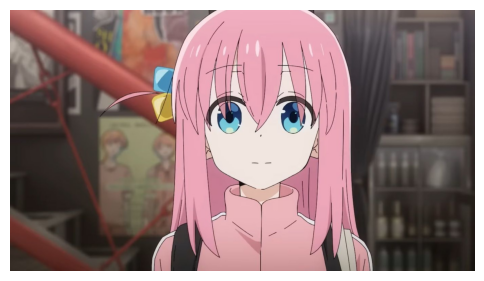

In [1]:
import cv2
import matplotlib.pyplot as plt

img_src = cv2.imread(r'images/bocchi4.jpg',cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]

plt.figure(figsize=(6,8))
plt.axis('off')
plt.imshow(cv2.cvtColor(img_src,cv2.COLOR_BGR2RGB))
plt.show()

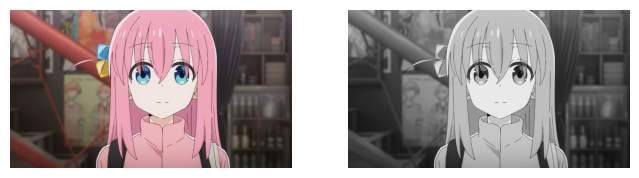

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_src = cv2.imread(r'images/bocchi4.jpg')
height, width = img_src.shape[:2]

# 원본 영상 : img_src
############### 이미지를 Gray로 변경하기 ##################
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
##########################################################
plt.figure(figsize=(8,16))

plt.subplot(1, 2, 1) # 1x2의 첫번째
plt.axis('off')
plt.imshow(cv2.cvtColor(img_src,cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2) # 1x2의 두번째
plt.axis('off')
plt.imshow(cv2.cvtColor(img_gray,cv2.COLOR_BGR2RGB))

plt.show()

In [3]:
import cv2
img_src = cv2.imread(r"images\bocchi4.jpg", cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

cv2.imshow('src', img_src)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
#RGB 색공간

import cv2
import numpy as np

img_src = cv2.imread(r"images\lycoreco.jpg", cv2.IMREAD_COLOR)
img_b, img_g,img_r = cv2.split(img_src)
print(img_b.shape, img_g.shape, img_r.shape) # split을 하니 (848, 600) 등 채널 차원이 날라감 => 만약 파란색을 만들려면 3채널이 되어야 하니 B는 두되 zero인 G와 R을 추가해야

height, width = img_src.shape[:2]
img_zero2 = np.zeros_like(img_src)
print(img_zero2.shape) #3채널 검정이라 위 코드는 이용하면 안돼
img_zero = np.zeros((height,width,1), dtype=np.uint8) #1채널 검정이미지 생성
print(img_zero.shape)
img_dst_b = cv2.merge((img_b,img_zero,img_zero)) #1채널 블루와 1채널 검정 2개를 merge
img_dst_g = cv2.merge((img_zero,img_g,img_zero))
img_dst_r = cv2.merge((img_zero,img_zero,img_r))
img_dst_rgb = cv2.merge((img_b,img_g,img_r))
print(img_dst_b.shape) #1채널로 split된 img_b가 img_zero와 머지해 3채널로 복귀. 칼라로 보이게 된다
img_dst_bg = cv2.merge((img_b,img_g,img_zero)) #블루와 그린이 섞인 청록색. img_zero를 빼고 합병하니 오류가 난다.
img_dst_gr = cv2.merge((img_zero,img_g,img_r))
img_dst_br = cv2.merge((img_b,img_zero,img_r))

# cv2.imshow('b', img_b)
# cv2.imshow('g', img_g)
# cv2.imshow('r', img_r)
# cv2.imshow('src', img_src)
# cv2.imshow('zero', img_zero)

cv2.imshow('r', img_dst_r)
cv2.imshow('g', img_dst_g)
cv2.imshow('b', img_dst_b)
cv2.imshow('bg', img_dst_bg)
cv2.imshow('gr', img_dst_gr)
cv2.imshow('br', img_dst_br)
cv2.imshow('rgb', img_dst_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

(848, 600) (848, 600) (848, 600)
(848, 600, 3)
(848, 600, 1)
(848, 600, 3)


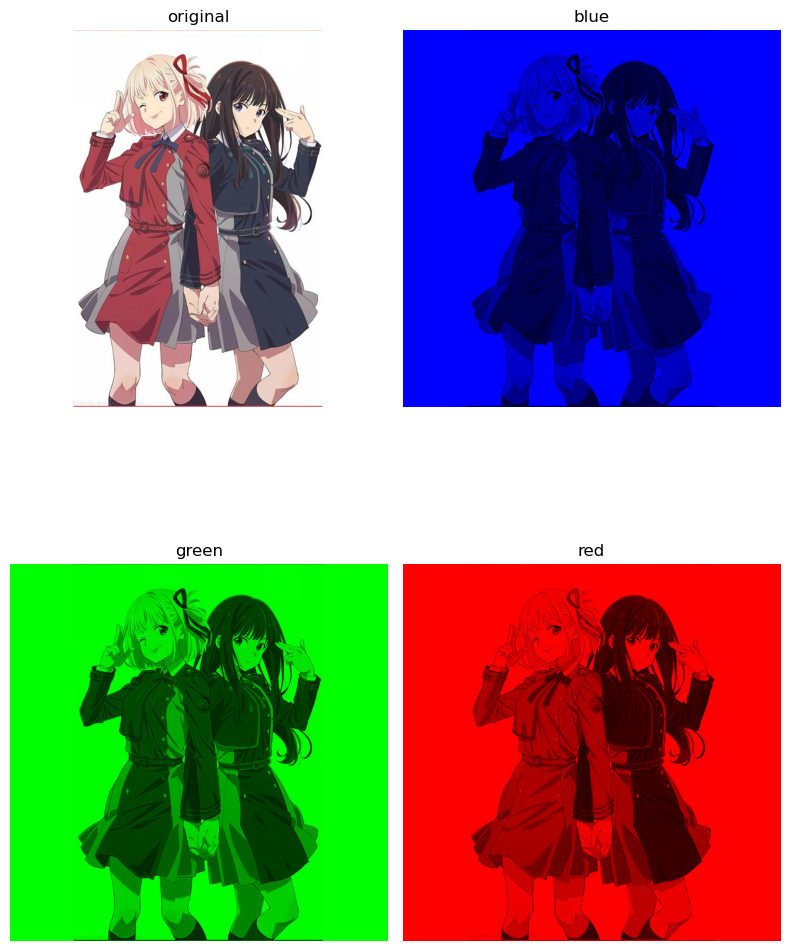

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img_src = cv2.imread(r'images/lycoreco2.jpg',cv2.IMREAD_COLOR)
img_b, img_g, img_r = cv2.split(img_src)
height, width = img_src.shape[:2]
img_zero = np.zeros((height,width,1), dtype=np.uint8)

fig, axs = plt.subplots(2,2, figsize=(8,12))
axs = axs.flatten()

### Image Channel Merge
img_b = cv2.merge((img_b,img_zero,img_zero))
img_g = cv2.merge((img_zero,img_g,img_zero))
img_r = cv2.merge((img_zero,img_zero,img_r))

#### Image를 BGR -> RGB
img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)
img_g = cv2.cvtColor(img_g, cv2.COLOR_BGR2RGB)
img_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)

images = [img_src, img_b, img_g, img_r]
titles = ['original','blue','green','red']
# for문으로 적용
for i in range(len(images)):
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
img_src = cv2.imread(r'images\rgb.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
img_b, img_g, img_r = cv2.split(img_src)

cv2.imshow('src', img_src)
cv2.imshow('b', img_b)
cv2.imshow('g', img_g)
cv2.imshow('r', img_r)
cv2.waitKey()
cv2.destroyAllWindows()

(600, 800)


In [17]:
import cv2
import numpy as np

capture = cv2.VideoCapture(r'video\frieren.mp4')  # 비디오 파일 경로 확인!
if not capture.isOpened():
    print('동영상을 열 수 없습니다.')
    exit(1)

while True:
    ret, frame = capture.read()
    if not ret:
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue

    # 원본 프레임의 크기를 얻습니다.
    height, width = frame.shape[:2]
    resized_frame = cv2.pyrDown(frame)

    # 채널 분리 및 0으로 채운 이미지 생성 (크기 조정 후 크기를 맞춰서 생성)
    b, g, r = cv2.split(resized_frame)
    zero_channel = np.zeros_like(b)  # b 채널과 같은 크기의 0 채널 생성

    # 채널별 이미지 병합
    b_channel_img = cv2.merge((b, zero_channel, zero_channel))
    g_channel_img = cv2.merge((zero_channel, g, zero_channel))
    r_channel_img = cv2.merge((zero_channel, zero_channel, r))

    # 2x2 배열로 이미지 연결
    top = cv2.hconcat([resized_frame, r_channel_img])
    bottom = cv2.hconcat([b_channel_img, g_channel_img])
    output_frame = cv2.vconcat([top, bottom])

    cv2.imshow('video', output_frame)
    if cv2.waitKey(33) == 27:  # Esc 키로 종료
        break

capture.release()
cv2.destroyAllWindows()

## 역상(Reverse Image)
- RGB 3CH, 0~255까지의 정수값(np.uint8)
- 역상(이미지를 뒤집는다) : 255-현재 픽셀값
- 흰색(255) -> 검정(0) / 검정(0) -> 흰색(255)
- 255-255 = 0    / 255-0 = 255
- img_dst = cv2.bitwise_not(img_src)
- img_dst = 255-img_src

In [20]:
import cv2
img_src = cv2.imread(r'images\hisame.jpg', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
# img_dst = cv2.bitwise_not(img_src)
img_dst = 255- img_src

cv2.imshow('src', img_src)
cv2.imshow('dst', img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2

capture = cv2.VideoCapture(r'video\frieren.mp4')
if capture.isOpened() == False:
    print('동영상을 열수 없습니다.')
    exit(1)
frame_num = capture.get(cv2.CAP_PROP_FRAME_COUNT)
while True:
    ret, frame = capture.read()  
    if not ret:  # 비디오 파일의 끝에 도달했는지 확인. ret 값이 False가 되면 종료
        break
    height, width = frame.shape[:2] # 높이와 너비를 얻는 부분 추가
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)
    frame_now = capture.get(cv2.CAP_PROP_POS_FRAMES)
    frame = cv2.putText(frame,f'{int(frame_now):04d} / {int(frame_num):04d}', (10,30), 
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    ###################### 동영상에 원하는 기능을 구현 ##############################
    height, width = frame.shape[:2] #이 코드가 아래 pyrDown 밑으로 갔어야. 
    height = height//2
    width = width//2
    resized_frame = cv2.pyrDown(frame) 
    frame_roi = resized_frame[height//4:height*3//4, width//4:width*3//4] # // 연산자 사용하여 정수 나눗셈
    frame_dst = 255 - frame_roi
    resized_frame[height//4:height*3//4, width//4:width*3//4] = frame_dst
    ###############################################################################
    cv2.imshow('video', resized_frame) # frame_dst 대신 frame 사용
    if cv2.waitKey(33) == 27: # Esc
        break
capture.release()
cv2.destroyAllWindows()

In [33]:
#위 코드를 개선한 코드

import cv2

capture = cv2.VideoCapture(r'video\kickback.mp4')
if capture.isOpened() == False:
    print('동영상을 열수 없습니다.')
    exit(1)
frame_num = capture.get(cv2.CAP_PROP_FRAME_COUNT)
while True:
    ret, frame = capture.read()  
    if not ret:  
        break
    height, width = frame.shape[:2] 
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)
    frame_now = capture.get(cv2.CAP_PROP_POS_FRAMES)
    frame = cv2.putText(frame,f'{int(frame_now):04d} / {int(frame_num):04d}', (10,30), 
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    resized_frame = cv2.pyrDown(frame)
    height, width = resized_frame.shape[:2] # 수정: pyrDown 후 크기를 가져옵니다.
    frame_roi = resized_frame[height//4:height*3//4, width//4:width*3//4] 
    frame_dst = 255 - frame_roi
    resized_frame[height//4:height*3//4, width//4:width*3//4] = frame_dst
    
    cv2.imshow('video', resized_frame) 
    if cv2.waitKey(33) == 27: 
        break
capture.release()
cv2.destroyAllWindows()

In [35]:
import cv2

capture = cv2.VideoCapture('video/genshin.mp4')
if capture.isOpened() == False:
    print('동영상을 열수 없습니다.')
    exit(1)
frame_num = capture.get(cv2.CAP_PROP_FRAME_COUNT)

while True:
    ret, frame = capture.read()  # frame이 img_src랑 동일하게 생각!!!
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)
    frame_now = capture.get(cv2.CAP_PROP_POS_FRAMES)
    frame = cv2.putText(frame,f'{int(frame_now):04d} / {int(frame_num):04d}', (10,30), 
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    ###################### 동영상에 원하는 기능을 구현 ##############################
    height, width = frame.shape[:2]
    h_start = height//5; h_end = int(height*4/5)
    w_start = width//5; w_end = int(width*4/5)

    frame_crop = frame[h_start:h_end, w_start:w_end].copy()
    frame = 255 - frame
    frame[h_start:h_end, w_start:w_end] = frame_crop
    ###############################################################################
    cv2.imshow('video',frame)
    if cv2.waitKey(33) == 27: # Esc
        break
capture.release()
cv2.destroyAllWindows()

## 이진화
- 어느 지점을 기준으로 값이 높거나 낮은 픽셀의 값을 대상으로 특정 연산(여러가지 종류)을 수행
- 우선적으로 칼라이미지를 1채널 영상 (gray)으로 변환 후 이진화 진행
- img_dst = cv2.threshold(img_gray, 임계값, 참일때값, 이진화모드)

-이진화 모드 
-           : cv2.THRESH_BINARY / cv2.THRESH_BINARY_INV
-           : cv2.THRESH_TRUNC  / cv2.THRESH_MASK
-           : cv2.THRESH_TOZERO  / cv2.THRESH_TOZERO_INV
-           : cv2.THRESH_OTSU  / cv2.THRESH_TRIANGLE

ret, img_dst = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY) 이 코드에 대해 설명해줘



100: 임계값(threshold)입니다. 이 값보다 큰 픽셀 값은 흰색(255)으로, 작거나 같은 픽셀 값은 검정색(0)으로 변환됩니다.

255: 최대값(maxval)입니다. 임계값보다 큰 픽셀 값이 이 값으로 설정됩니다. 이 예시에서는 흰색을 나타냅니다.

cv2.THRESH_BINARY: 이진화 방식을 지정하는 플래그입니다. cv2.THRESH_BINARY는 간단한 임계값을 적용하는 방식입니다. 임계값보다 크면 최대값(255), 작거나 같으면 0으로 설정됩니다. 다른 이진화 방식도 존재합니다 (예: cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV).

ret: 함수가 반환하는 첫 번째 값은 임계값(threshold) 자체입니다. 이 값은 사용하지 않을 수도 있지만, 어떤 알고리즘에서는 필요할 수 있습니다. (이 예시에서는 cv2.THRESH_BINARY이기 때문에 입력값 100과 동일할 것입니다.)

img_dst: 함수가 반환하는 두 번째 값은 이진화된 이미지입니다. 원본 img_gray와 같은 크기의 2차원 배열이며, 각 픽셀의 값은 0 또는 255 중 하나입니다.

요약:

이 코드는 img_gray 이미지의 각 픽셀 값을 100과 비교하여 100보다 크면 255(흰색), 그렇지 않으면 0(검정)으로 설정하여 이진 이미지 img_dst를 생성합니다. 결과적으로 밝은 부분은 흰색으로, 어두운 부분은 검정색으로 표현된 흑백 이미지가 생성됩니다. 임계값 100은 적절한 값인지 이미지에 따라 조정해야 합니다.


정의역 임계치 100을 기준으로 값이 나뉘는 헤비사이드 계단 함수라 생각하자.

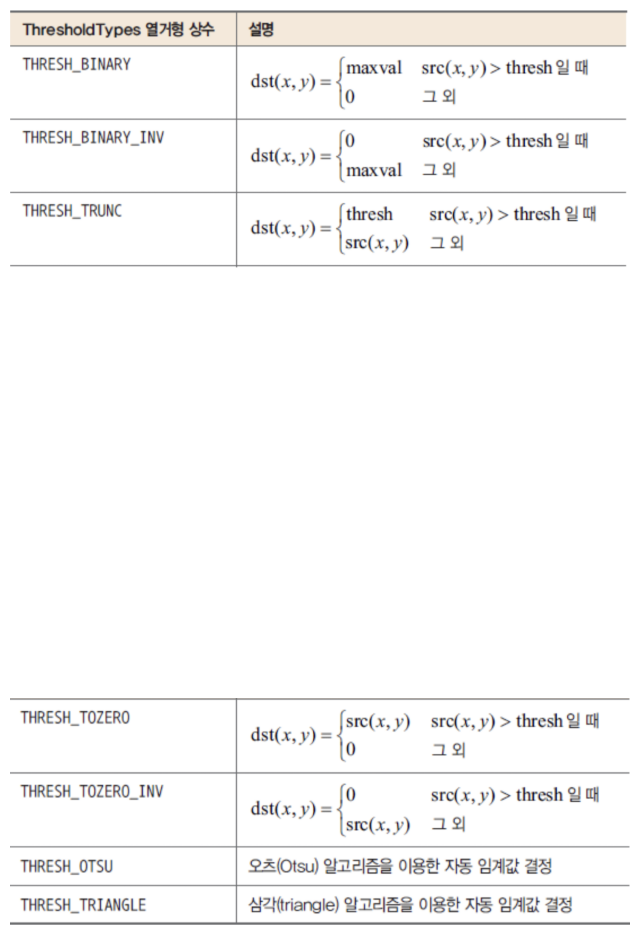

In [57]:
import cv2
import matplotlib.pyplot as plt

img_src = cv2.imread(r'img_s/binarization0.png')
height, width = img_src.shape[:2]

img_src2 = cv2.imread(r'img_s/binarization1.png')
height2, width2 = img_src2.shape[:2]

plt.figure(figsize=(8,16))

plt.subplot(2, 1, 1) # 1x2의 첫번째
plt.axis('off')
plt.imshow(cv2.cvtColor(img_src,cv2.COLOR_BGR2RGB))

plt.subplot(2, 1, 2) # 1x2의 두번째
plt.axis('off')
plt.imshow(cv2.cvtColor(img_src2,cv2.COLOR_BGR2RGB))

plt.show()

In [52]:
import cv2

img_src = cv2.imread('images/dino1.jpg',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
cv2.imshow("src",img_src)
################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('result',img_dst)
########################################################
cv2.waitKey()
cv2.destroyAllWindows()

In [58]:
import cv2

img_src = cv2.imread(r'images/dino1.jpg',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
img_dst = cv2.bitwise_not(img_dst) #역상을 취해 위 코드와 등가
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [59]:
import cv2

img_src = cv2.imread('images/shape2.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 100, 255, cv2.THRESH_TRUNC)
#img_dst = cv2.bitwise_not(img_dst)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [60]:
import cv2

img_src = cv2.imread('images/shape2.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 50, 255, cv2.THRESH_TOZERO)
#img_dst = cv2.bitwise_not(img_dst)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
import cv2

img_src = cv2.imread('images/shape2.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 225, 255, cv2.THRESH_TOZERO_INV)
#img_dst = cv2.bitwise_not(img_dst)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [62]:
import cv2

img_src = cv2.imread('images/shape2.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 225, 255, cv2.THRESH_OTSU)
#img_dst = cv2.bitwise_not(img_dst)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [63]:
import cv2

img_src = cv2.imread('images/shape2.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 50, 255, cv2.THRESH_TRIANGLE)
#img_dst = cv2.bitwise_not(img_dst)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

오츠 알고리즘(Otsu's method)을 사용하는 경우, 임계값을 직접 지정할 필요가 없습니다. 코드에서 50이라는 값은 cv2.THRESH_OTSU와 함께 사용될 때는 무시됩니다. 오츠 알고리즘이 이미지의 히스토그램을 분석하여 최적의 임계값을 자동으로 계산하기 때문입니다. ret 변수에 저장되는 값이 바로 오츠 알고리즘이 계산한 최적의 임계값입니다.

In [67]:
import cv2

img_src = cv2.imread('images/sudoku.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
ret, img_dst = cv2.threshold(img_gray, 15, 255, cv2.THRESH_OTSU)
#img_dst = cv2.bitwise_not(img_dst)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 적응형 이진화
 - 주변이미지의 평균값을 기준으로 임계값을 적용
 - 전체가 아니고 작은영역을 기준으로 하기때문에 영상의 밝기값이 변하더라도 적용가능
 - cv2.ADAPTIVE_THRESH_MEAN_C
 - cv2.ADAPTIVE_THRESH_GAUSSIAN_C

img_gray: 입력 이미지입니다. 이 함수는 그레이스케일 이미지를 입력으로 받아야 합니다. 컬러 이미지를 사용하려면 cv2.cvtColor() 함수를 사용하여 먼저 그레이스케일로 변환해야 합니다.

255: 임계값을 초과하는 픽셀에 할당될 값입니다. 이 경우 흰색(255)으로 설정되어 있습니다. 임계값 미만의 픽셀은 검은색(0)이 됩니다.

cv2.ADAPTIVE_THRESH_MEAN_C: 적응형 임계값 계산 방법을 지정합니다. ADAPTIVE_THRESH_MEAN_C는 해당 픽셀의 이웃 영역의 평균 값을 사용하여 임계값을 계산합니다. 다른 옵션으로는 cv2.ADAPTIVE_THRESH_GAUSSIAN_C가 있는데, 가우시안 가중치를 사용하여 이웃 영역의 평균을 계산합니다.

cv2.THRESH_BINARY: 임계값 처리 유형을 지정합니다. THRESH_BINARY는 픽셀 값이 임계값보다 크면 255 (흰색), 작으면 0 (검은색)으로 설정합니다. 다른 옵션으로는 THRESH_BINARY_INV (반전), THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV 등이 있습니다.

아래는 로컬영역 설정

467: 적응형 임계값을 계산할 이웃 영역의 크기 (블록 크기)입니다. 이 값은 홀수 정수여야 합니다. 467 x 467 픽셀의 영역이 사용된다는 의미입니다. 이 값이 클수록 큰 영역의 특징을 잡아내고, 작을수록 작은 영역의 특징을 잡아냅니다. 너무 크면 디테일이 손실될 수 있고, 너무 작으면 노이즈에 민감해질 수 있습니다.

37: 이웃 영역의 평균에서 빼는 상수 값 (C) 입니다. 이 값을 조정하여 임계값을 미세하게 조절할 수 있습니다. 양수 값을 사용하면 임계값이 높아지고, 음수 값을 사용하면 임계값이 낮아집니다.

In [68]:
import cv2

img_src = cv2.imread('images/sudoku2.jpg',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 적응형 임계값
img_dst = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 467, 37)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [69]:
import cv2

img_src = cv2.imread('images/sudoku2.jpg',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

################ 원하는 코드 구현 #######################
# 1. 이미지 그래이스캐일로 변환
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
# 2. 적응형 임계값
#img_dst = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 467, 37)
img_dst = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 467, 37)
########################################################
cv2.imshow("src",img_src)
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#내가 실수한 코드. 개선된 버젼은 아래

import cv2

capture = cv2.VideoCapture('video/genshin.mp4')
if capture.isOpened() == False:
    print('동영상을 열수 없습니다.')
    exit(1)
frame_num = capture.get(cv2.CAP_PROP_FRAME_COUNT)

while True:
    ret, frame = capture.read()  # frame이 img_src랑 동일하게 생각!!!
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)
    frame_now = capture.get(cv2.CAP_PROP_POS_FRAMES)
    frame = cv2.putText(frame,f'{int(frame_now):04d} / {int(frame_num):04d}', (10,30), 
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    ###################### 동영상에 원하는 기능을 구현 ##############################
    height, width = frame.shape[:2]
    h_start = height//5; h_end = int(height*4/5)
    w_start = width//5; w_end = int(width*4/5)

    frame_crop = frame[h_start:h_end, w_start:w_end].copy()

    # 1. 이미지 그래이스캐일로 변환
    frame_crop_gray = cv2.cvtColor(frame_crop, cv2.COLOR_BGR2GRAY)
    # 2. 이미지 이진화 적용 (THRESH_BINARY / THRESH_BINARY_INV / THRESH_TRUNC / ...)
    ret, frame_dst = cv2.threshold(frame_crop_gray, 225, 255, cv2.THRESH_OTSU)

    frame[h_start:h_end, w_start:w_end] = frame_dst
    ###############################################################################
    cv2.imshow('video',frame)
    if cv2.waitKey(33) == 27: # Esc
        break
capture.release()
cv2.destroyAllWindows()

ValueError: could not broadcast input array from shape (432,768) into shape (432,768,3)

에러 메시지 ValueError: could not broadcast input array from shape (432,768) into shape (432,768,3)는 frame_dst 의 shape (432, 768) 과 frame[h_start:h_end, w_start:w_end] 의 shape (432, 768, 3) 이 서로 맞지 않아서 발생하는 오류입니다.

frame_dst는 이진화된 그레이스케일 이미지이므로 채널이 1개(흑백)인데, frame[h_start:h_end, w_start:w_end] 는 원본 영상의 일부분으로 채널이 3개(BGR) 입니다. 즉, 흑백 이미지를 컬러 이미지 영역에 넣으려고 하니 차원이 맞지 않는다는 것입니다.

해결 방법은 frame_dst를 3채널로 변환한 후에 frame에 할당해야 합니다. cv2.cvtColor 함수를 사용하여 그레이스케일 이미지를 3채널 BGR 이미지로 변환할 수 있습니다.

In [1]:
import cv2

capture = cv2.VideoCapture('video\idol.mp4')
if capture.isOpened() == False:
    print('동영상을 열수 없습니다.')
    exit(1)
frame_num = capture.get(cv2.CAP_PROP_FRAME_COUNT)

while True:
    ret, frame = capture.read()
    if not ret: # 비디오 끝까지 읽었는지 확인. capture.read()가 False를 반환하면 끝.
        break
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        capture.set(cv2.CAP_PROP_POS_FRAMES, 0)
    frame_now = capture.get(cv2.CAP_PROP_POS_FRAMES)
    frame = cv2.putText(frame,f'{int(frame_now):04d} / {int(frame_num):04d}', (10,30), 
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    frame = cv2.pyrDown(frame)
    height, width = frame.shape[:2]
    h_start = height//5; h_end = int(height*4/5)
    w_start = width//5; w_end = int(width*4/5)

    frame_crop = frame[h_start:h_end, w_start:w_end].copy()

    frame_crop_gray = cv2.cvtColor(frame_crop, cv2.COLOR_BGR2GRAY)
    ret, frame_dst = cv2.threshold(frame_crop_gray, 225, 255, cv2.THRESH_OTSU)

    # 여기가 수정된 부분입니다.
    print(frame_crop_gray.shape)
    print(frame_dst.shape)
    frame_dst = cv2.cvtColor(frame_dst, cv2.COLOR_GRAY2BGR)  # 그레이스케일을 3채널 BGR로 변환

    frame[h_start:h_end, w_start:w_end] = frame_dst
    cv2.imshow('video',frame)
    if cv2.waitKey(33) == 27: # Esc
        break
capture.release()
cv2.destroyAllWindows()

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8156\3182390647.py:3: SyntaxWarning: invalid escape sequence '\i'
  capture = cv2.VideoCapture('video\idol.mp4')


(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)
(324, 576)


네, 맞습니다. frame 은 3채널(BGR) 컬러 이미지이지만, frame_crop_gray = cv2.cvtColor(frame_crop, cv2.COLOR_BGR2GRAY) 라인에서 cv2.cvtColor(..., cv2.COLOR_BGR2GRAY) 함수를 사용하여 그레이스케일로 변환하는 순간 채널 정보가 사라집니다. cv2.COLOR_BGR2GRAY 변환은 3개의 채널(B, G, R)을 하나의 채널(그레이스케일)로 합치는 과정이기 때문에 결과인 frame_crop_gray 는 높이와 너비만 가지는 2차원 배열이 됩니다. 그래서 이후에 frame_dst도 2차원 배열이 되는 것입니다.

따라서 frame_crop_gray 부터 채널 차원이 사라지는 것이 정상적인 동작입니다. cv2.cvtColor 함수의 COLOR_BGR2GRAY 옵션은 의도적으로 채널 정보를 제거하여 그레이스케일 이미지를 생성합니다. 이후 이진화 과정을 거친 frame_dst도 채널 정보가 없는 2차원 배열입니다. 이를 다시 3채널로 변환하려면 cv2.cvtColor(..., cv2.COLOR_GRAY2BGR)를 사용해야 하는 것이 맞습니다.